# Programming Problems:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
import imageio
%matplotlib inline

In [2]:
plt.rcParams.update({'image.interpolation': None})

## 03-01 Image Intensity Transformations

In [402]:
I_dark = np.asarray(imageio.imread('pollen_dark.tif'))
I_light = np.asarray(imageio.imread('pollen_light.tif'))
I_low = np.asarray(imageio.imread('pollen_lowcontrast.tif'))
I_high = np.asarray(imageio.imread('pollen_highcontrast.tif'))

In this part, i try to transform the image to the high contrast image with trail and error in different transformation function (log, power-law and nagative) and play with thier varaible to obtain the best result.

(-0.5, 499.5, 499.5, -0.5)

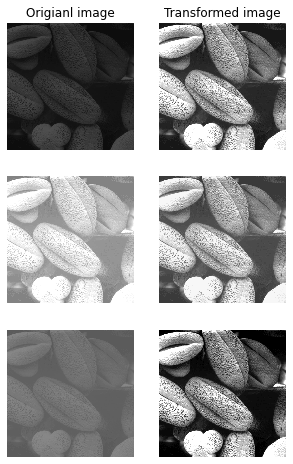

In [4]:
plt.figure(figsize=(5,8))

plt.subplot(321)
plt.imshow(I_dark,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Origianl image")

def T_dark(image, c, y):
    output=c*(image**y)
    return output
J_dark=T_dark(I_dark, 0.5, 1.5)
plt.subplot(322)
plt.imshow(J_dark,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Transformed image")


plt.subplot(323)
plt.imshow(I_light,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

def T_light(image, c, y):
    output=c*(image**y)
    return output
J_light=T_light(I_light, 1/800, 2.2)
plt.subplot(324)
plt.imshow(J_light,cmap='gray', vmin=0, vmax=255)
plt.axis('off')


plt.subplot(325)
plt.imshow(I_low,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

def T_low(image, c, y):
    output=c*(image-image.min())**y
    return output
J_low=T_low(I_low, 1.2, 1.5)
plt.subplot(326)
plt.imshow(J_low,cmap='gray', vmin=0, vmax=255)
plt.axis('off')


For achieving the final transformation function, firstly, get the min and max of each image and then calculate how it is possible to map them in the range of 0 and 255 with log or power-law transformation.  Then, do some trial and error in variables c and y to find the picture has more similarity o the high contrast picture. For the dark picture, it should be stretched the range of intensity on high values of intensities and for the light picture, it should be stretched on low values of intensities.

### (b) Compute MSE 

In [73]:
mse_dark = np.mean((I_high-J_dark)**2)
mse_light = np.mean((I_high-J_light)**2)
mse_low = np.mean((I_high-J_low)**2)
print("The MSE between I_dark and J_dark is  " + str(mse_dark))
print("The MSE between I_ligh and J_light is  " + str(mse_light))
print("The MSE between I_low and J_low is  " + str(mse_low))

The MSE between I_dark and J_dark is  434.02025580528084
The MSE between I_ligh and J_light is  1296.2264144102735
The MSE between I_low and J_low is  439.4054727697757


The MSE of the transformed image of the light image is more than others. As it is shown in part (a), its appearance is not as good as others. J_low and J_min has the same MSE, because at first, its intensity is subtracted from its minimum value and its intensities become similar to the dark image and then its range is stretched on the range of 0 and 255.

## 03-02 Image Histograms

### (a) Image Histograms

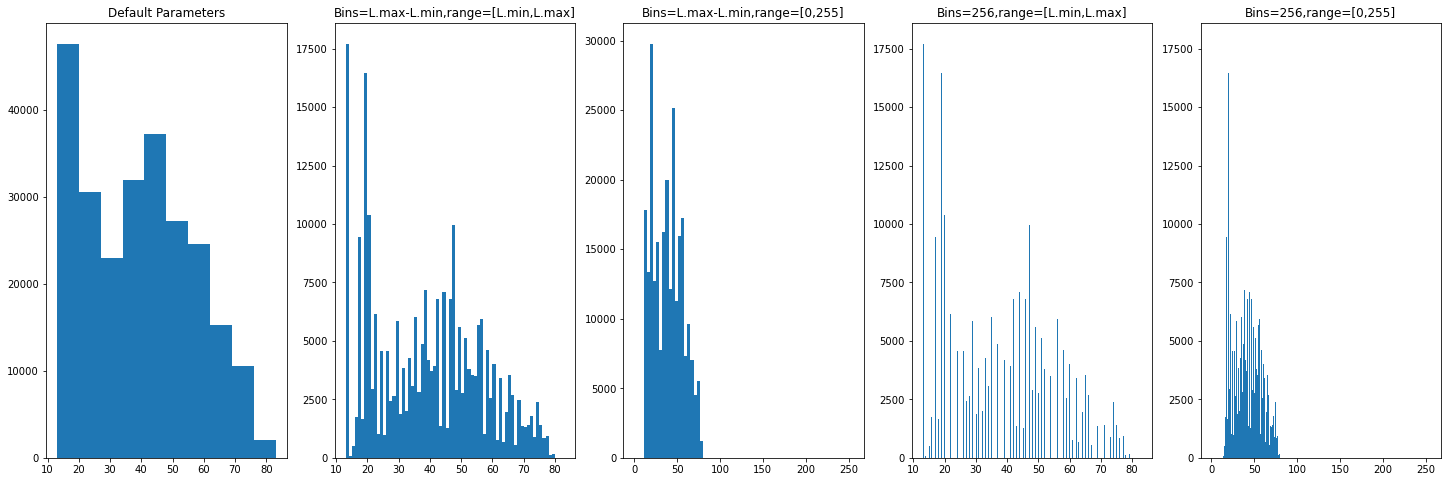

In [22]:
plt.figure(figsize=(25,8))
plt.subplot(151)
plt.hist(I_dark.flatten())
plt.title("Default Parameters")
plt.subplot(152)
plt.hist(I_dark.flatten(), bins=I_dark.max()-I_dark.min(), range=[I_dark.min(),I_dark.max()])
plt.title("Bins=L.max-L.min,range=[L.min,L.max]")
plt.subplot(153)
plt.hist(I_dark.flatten(), bins=I_dark.max()-I_dark.min(), range=[0,255])
plt.title("Bins=L.max-L.min,range=[0,255]")
plt.subplot(154)
plt.hist(I_dark.flatten(), bins=256, range=[I_dark.min(),I_dark.max()])
plt.title("Bins=256,range=[L.min,L.max]")
plt.subplot(155)
plt.hist(I_dark.flatten(), bins=256, range=[0,255])
plt.title("Bins=256,range=[0,255]")
plt.show()

The default parameters of plt.hist are for bins is 10 and for range is between L.min and L.max.
These all 5 figures have different appearance because of having different values for their bins and range. The value of bins defines the number of bins and the range defines the lower and upper range of bins.

### (b) Image Histogram Variables

(array([47610., 30602., 22964., 31888., 37249., 27256., 24524., 15289.,
       10557.,  2061.]), array([13., 20., 27., 34., 41., 48., 55., 62., 69., 76., 83.]), <BarContainer object of 10 artists>)


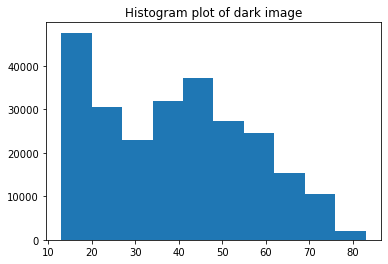

In [389]:
h=plt.hist(I_dark.flatten())
plt.title("Histogram plot of dark image")
print(h)

The plt.hist returns three outputs. The fist one is an array which is the values of the histogram bins. The second one is also an array with length of bins+1 and it is the edges of the bins. The third on is patchesBarContainer or list of a single Polygon or list of such objects. Container of individual artists used to create the histogram.

Plot bar chart of histogram from the output of plt.hist()

Text(0.5, 1.0, 'The bar chart of histogram')

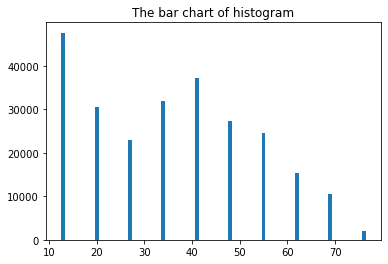

In [24]:
h1=h[1][:-1]
plt.bar(h1,h[0])
plt.title("The bar chart of histogram")

For plotting this bar chart, the first output of histogram is used as the height of each bar and the location of this bar is chosed based on the second output of histogram which are bins. The size of the bins array is one element more than the first array so I omit the last one to plot the bar chart.

### (c) Image Histograms for float-Valued Images:

In [390]:
I_dark_float=I_dark.astype(float)

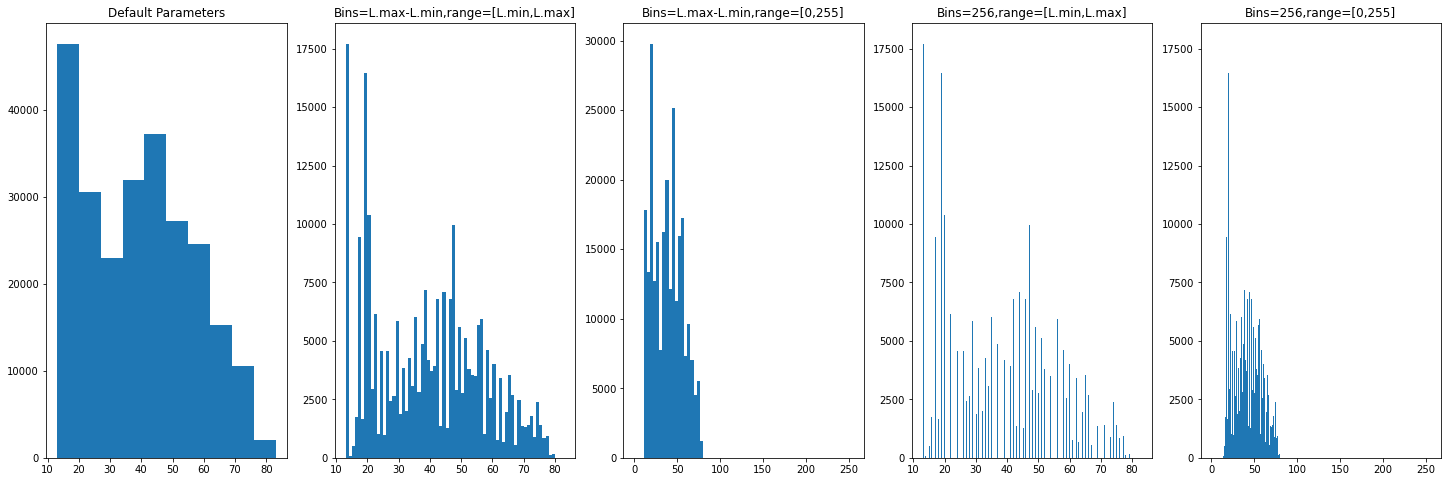

In [391]:
plt.figure(figsize=(25,8))
plt.subplot(151)
plt.hist(I_dark_float.flatten())
plt.title("Default Parameters")
plt.subplot(152)
plt.hist(I_dark_float.flatten(), bins=I_dark.max()-I_dark.min(), range=[I_dark.min(),I_dark.max()])
plt.title("Bins=L.max-L.min,range=[L.min,L.max]")
plt.subplot(153)
plt.hist(I_dark_float.flatten(), bins=I_dark.max()-I_dark.min(), range=[0,255])
plt.title("Bins=L.max-L.min,range=[0,255]")
plt.subplot(154)
plt.hist(I_dark_float.flatten(), bins=256, range=[I_dark.min(),I_dark.max()])
plt.title("Bins=256,range=[L.min,L.max]")
plt.subplot(155)
plt.hist(I_dark_float.flatten(), bins=256, range=[0,255])
plt.title("Bins=256,range=[0,255]")
plt.show()

There is not any difference between the figure of this part and part (a). Because based on the help of plt.hist, numpy automatically makes the integers floats in this command.

### (d) Histograms using Functions not Designed/Optimized for 2D Inputs

Text(0.5, 1.0, '2D histogram of drak image')

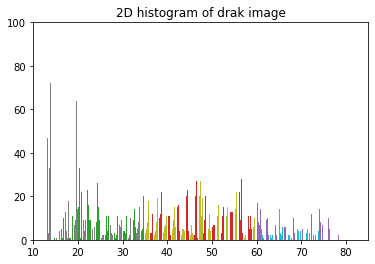

In [393]:
plt.axis([10, 85, 0, 100])
plt.hist(I_dark,bins=256, range=[0,256])
plt.title("2D histogram of drak image")

flatten() is a numpy function that converts the two-dimensional image into a one-dimensional array. So the output of this part is a histogram for two-dimensional input.

### (e) Images and Histograms

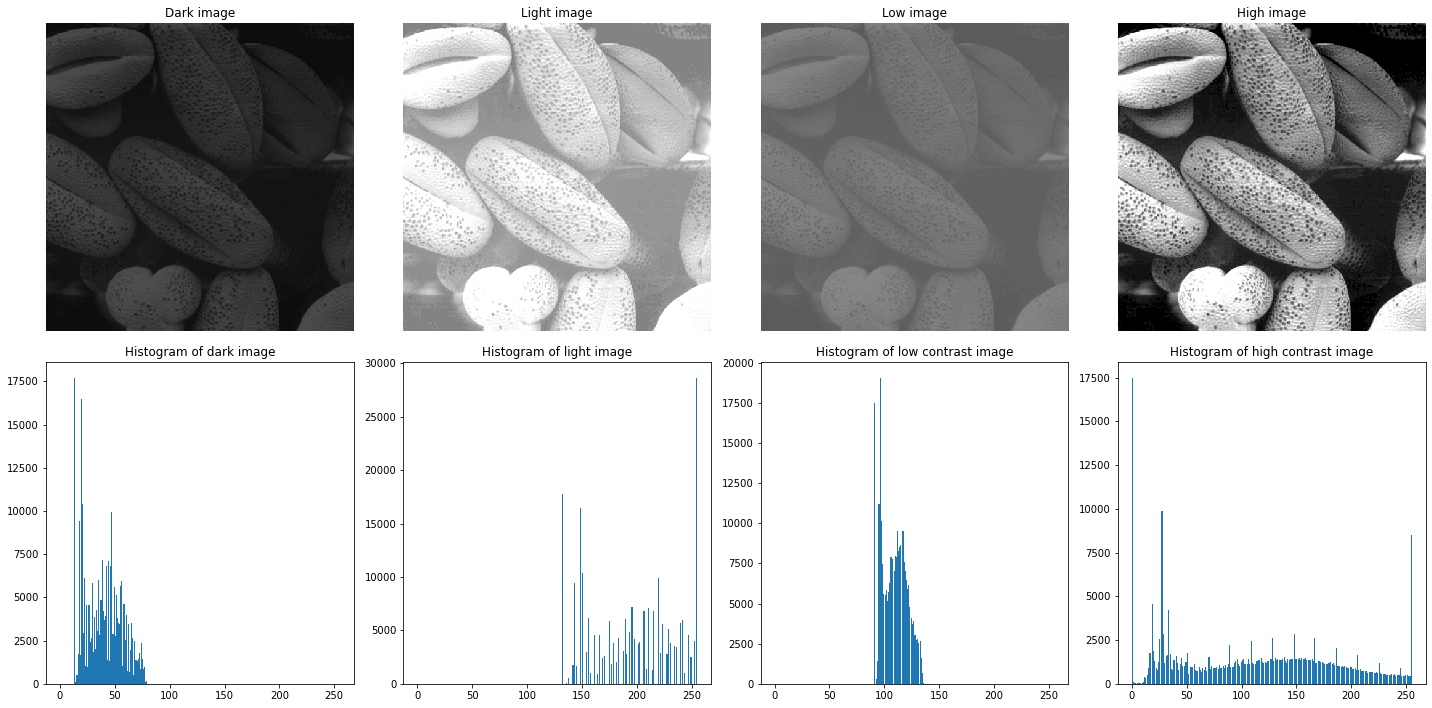

In [69]:
fig=plt.figure(figsize=(20,10))

plt.subplot(241)
plt.imshow(I_dark,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Dark image")
plt.subplot(242)
plt.imshow(I_light,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Light image")
plt.subplot(243)
plt.imshow(I_low,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Low image")
plt.subplot(244)
plt.imshow(I_high,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("High image")
plt.subplot(245)
plt.hist(I_dark.flatten(), bins=256, range=[0,255])
plt.title("Histogram of dark image")
plt.subplot(246)
plt.hist(I_light.flatten(), bins=256, range=[0,255])
plt.title("Histogram of light image")
plt.subplot(247)
plt.hist(I_low.flatten(), bins=256, range=[0,255])
plt.title("Histogram of low contrast image")
plt.subplot(248)
plt.hist(I_high.flatten(), bins=256, range=[0,255])
plt.title("Histogram of high contrast image")
fig.tight_layout()
plt.show()

The results are in the above figure indicate that the histogram of each image depends on intensities' values of the image. The histogram of the dark image shows that the components of the histogram are accumulated in the lower end of the histogram plot while in the light image, they are accumulated on the upper end. For the low contrast image the components of the image are located in the center of the histogram range while for the high contrast image, the components of the histogram are distributed in the range of the image intensities.

## 03-03 Histogram Equalization

### (a) Function histogram_equalize

In [ ]:
def histogram_equalize(I, h):
    T = np.zeros(h.shape)
    J = np.zeros(I.shape)
    p = h/(I.shape[0]*I.shape[1])
    for k in range(256):
        T[k] = (255*(p[0:k+1].sum())).astype(int)
        J[I==k] = T[k]
    return T, J  
[h_dark, bins, patches] = plt.hist(I_dark.flatten(), bins=256, range=[0,255])
[T_dark1, J_dark1] = histogram_equalize(I_dark, h_dark)
[h_light, bins, patches] = plt.hist(I_light.flatten(), bins=256, range=[0,255])
[T_light1, J_light1] = histogram_equalize(I_light, h_light)
[h_low, bins, patches] = plt.hist(I_low.flatten(), bins=256, range=[0,255])
[T_low1, J_low1] = histogram_equalize(I_low, h_low)
[h_high, bins, patches] = plt.hist(I_high.flatten(), bins=256, range=[0,255])
[T_high1, J_high1] = histogram_equalize(I_high, h_high)


For coding this function, at first I compute the histogram of image and then use the fisrt output of histogram to calculate the probability. Then, the transformation function is calculated and cast to integer. This function is used to map the original image to high contrast image.

<function matplotlib.pyplot.show(close=None, block=None)>

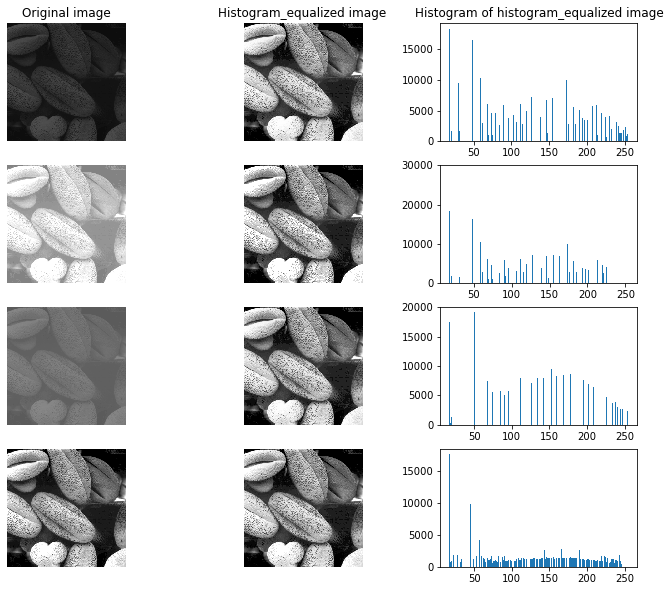

In [36]:

fig=plt.figure(figsize=(12,10))

plt.subplot(431)
plt.imshow(I_dark,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title("Original image")

plt.subplot(432)
plt.imshow(J_dark1,cmap='gray')
plt.axis('off')
plt.title("Histogram_equalized image")

plt.subplot(433)
plt.hist(J_dark1.flatten(), bins=256)
plt.title("Histogram of histogram_equalized image")
plt.show


plt.subplot(434)
plt.imshow(I_light,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(435)
plt.imshow(J_light1,cmap='gray')
plt.axis('off')

plt.subplot(436)
plt.hist(J_light1.flatten(), bins=256)
plt.show


plt.subplot(437)
plt.imshow(I_low,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(438)
plt.imshow(J_low1,cmap='gray')
plt.axis('off')

plt.subplot(439)
plt.hist(J_low1.flatten(), bins=256)
plt.show

fig.add_subplot(4, 3, 10)

plt.imshow(I_high,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

fig.add_subplot(4, 3, 11)
plt.imshow(J_high1,cmap='gray')
plt.axis('off')

fig.add_subplot(4, 3, 12)
plt.hist(J_high1.flatten(), bins=256)
plt.show


In [38]:
mse_dark = np.mean((I_dark-J_dark1)**2)
mse_light = np.mean((I_light-J_light1)**2)
mse_low = np.mean((I_low-J_low1)**2)
mse_high = np.mean((I_high-J_high1)**2)
print("The MSE between I_dark and J_dark is  " + str(mse_dark))
print("The MSE between I_ligh and J_light is  " + str(mse_light))
print("The MSE between I_low and J_low is  " + str(mse_low))
print("The MSE between I_high and J_high is  " + str(mse_high))

The MSE between I_dark and J_dark is  11418.909648
The MSE between I_ligh and J_light is  5334.060484
The MSE between I_low and J_low is  4173.756568
The MSE between I_high and J_high is  275.83276


The MSEs between the histogram_equalized images and the original images are shown. The dark image has the highest MSE while the high contrast image has the lowest one. The MSEs of this part differs from problem 03-01. The MSEs of this part are higher than the problem 03-01 but they have a more similar appearance to the high contrast image.

### (b) Plot Transformation Functions 

(0.0, 255.0, 0.0, 255.0)

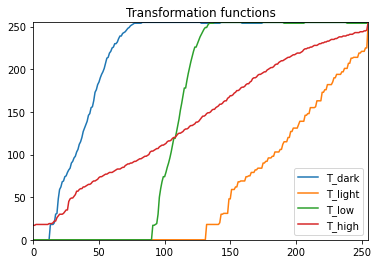

In [394]:
plt.plot(T_dark1)
plt.plot(T_light1)
plt.plot(T_low1)
plt.plot(T_high1)
plt.legend(['T_dark','T_light','T_low','T_high'])
plt.title("Transformation functions")
plt.axis([0, 255, 0, 255])

This figure shows the transformation functions used to generate the equalized images. The blue one is the transformation function of the dark image to the high contrast image. AS it is obvious, this function is mapped the intensities of the dark image in the whole range of [0,255] to obtain high contrast image. The transformation functions of low and light images do the same (green and orange lines, respectively). The red one is the transformation function of the high contrast image and it is nearly linear, indicating that the inputs were mapped to nearly equal outputs.

### (c) Histogram Equalization with Built-In Functions

<function matplotlib.pyplot.show(close=None, block=None)>

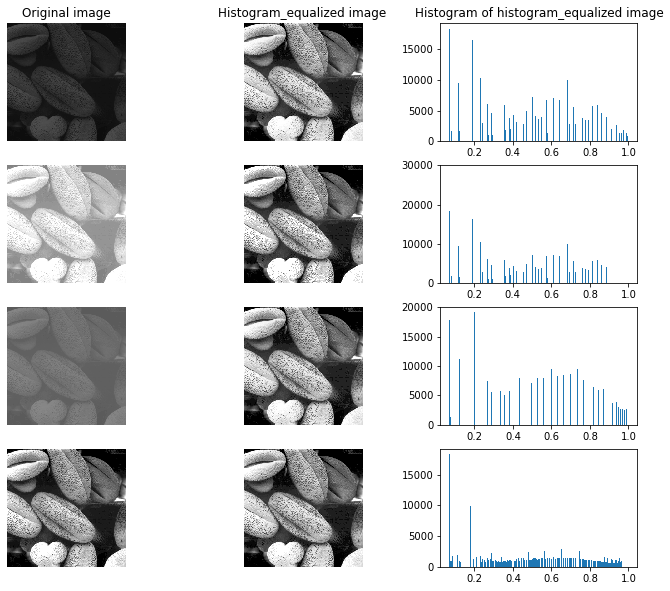

In [403]:

J_dark2 = exposure.equalize_hist(I_dark)
J_light2 = exposure.equalize_hist(I_light)
J_low2 = exposure.equalize_hist(I_low)
J_high2 = exposure.equalize_hist(I_high)

fig=plt.figure(figsize=(12,10))

plt.subplot(431)
plt.imshow(I_dark,cmap='gray', vmin=0, vmax=255)
plt.title("Original image")
plt.axis('off')

plt.subplot(432)
plt.imshow(J_dark2,cmap='gray')
plt.title("Histogram_equalized image")
plt.axis('off')

plt.subplot(433)
plt.hist(J_dark2.flatten(), bins=256)
plt.title("Histogram of histogram_equalized image")
plt.show


plt.subplot(434)
plt.imshow(I_light,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(435)
plt.imshow(J_light2,cmap='gray')
plt.axis('off')

plt.subplot(436)
plt.hist(J_light2.flatten(), bins=256)
plt.show


plt.subplot(437)
plt.imshow(I_low,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.subplot(438)
plt.imshow(J_low2,cmap='gray')
plt.axis('off')

plt.subplot(439)
plt.hist(J_low2.flatten(), bins=256)
plt.show

fig.add_subplot(4, 3, 10)

plt.imshow(I_high,cmap='gray', vmin=0, vmax=255)
plt.axis('off')

fig.add_subplot(4, 3, 11)
plt.imshow(J_high2,cmap='gray')
plt.axis('off')

fig.add_subplot(4, 3, 12)
plt.hist(J_high2.flatten(), bins=256)
plt.show



In [46]:
mse_dark = np.mean((I_dark-J_dark2)**2)
mse_light = np.mean((I_light-J_light2)**2)
mse_low = np.mean((I_low-J_low2)**2)
mse_high = np.mean((I_high-J_high2)**2)
print("The MSE between I_dark and J_dark2 is  " + str(mse_dark))
print("The MSE between I_ligh and J_light2 is  " + str(mse_light))
print("The MSE between I_low and J_low2 is  " + str(mse_low))
print("The MSE between I_high and J_high2 is  " + str(mse_high))

The MSE between I_dark and J_dark2 is  1750.0411895284071
The MSE between I_ligh and J_light2 is  39948.221200668915
The MSE between I_low and J_low2 is  11911.47111529583
The MSE between I_high and J_high2 is  18206.423493375027


The MSEs values of this part differs from part (a). The values of these MSEs are higher than the part (a).

In [48]:
mse_dark = np.mean((J_dark1-J_dark2)**2)
mse_light = np.mean((J_light1-J_light2)**2)
mse_low = np.mean((J_low1-J_low2)**2)
mse_high = np.mean((J_high1-J_high2)**2)
print("The MSE between J_dark and J_dark2 is  " + str(mse_dark))
print("The MSE between J_ligh and J_light2 is  " + str(mse_light))
print("The MSE between I_low and J_low2 is  " + str(mse_low))
print("The MSE between I_high and J_high2 is  " + str(mse_high))

The MSE between J_dark and J_dark2 is  22023.47131044559
The MSE between J_ligh and J_light2 is  22742.36833343084
The MSE between I_low and J_low2 is  22275.45134006725
The MSE between I_high and J_high2 is  21646.084525351245


These MSEs indicates that the histogram equalized image of the specific image is not unique. All of the obtained images have the high contrast intensities but their histogram is different. Both J1s and J2s images have high contrast intenisites but J1s images which are calculated by histogram_equalize function have intensities in range of [0,255] while J2s images have intensities in range of [0,1].

### (d) Function find_transformation

In [412]:
def find_transformation(I, J): 
    T=[]
    for k in range(256): 
        v=J[I==k]*255
        v1=np.unique(v)
        if v1.size==0:
            T1=0
        else:
            T1=v1
        T.append(T1)
        if T[k]==0:
            T[k]=T[k-1]
        else:
            T[k]=T[k]
    return T

T_dark2=find_transformation(I_dark, J_dark2) 
T_light2=find_transformation(I_light, J_light2)  
T_low2=find_transformation(I_low, J_low2)  
T_high2=find_transformation(I_high, J_high2)  

For writing this function, at first, I found the index of similar intensity of I in J and then multiply it to 255 based on its formula. In some conditions, there is not a specific intensity in I or J and I consider the previous value intensity for this issue.

(0.0, 255.0, 0.0, 255.0)

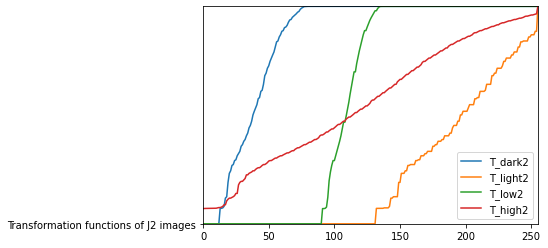

In [413]:
plt.plot(T_dark2)
plt.plot(T_light2)
plt.plot(T_low2)
plt.plot(T_high2)
plt.legend(['T_dark2','T_light2','T_low2','T_high2'])
plt.plot("Transformation functions of J2 images")
plt.axis([0, 255, 0, 255])

These four transformation function have the same structure as the transformation on part (a). All of them are mapped the original image to the range of [0,255] to provide the high contrast image. But these kind of functions are not unique and have different values.
In this part, for the situation that the intensity is not represented in I or J, with some trial and error and plotting these functions, I found that I get the best result by allocating the previous value to this intensity.

### (e) Image Differencing of Results

For this purpose, images substraction is used to enhancing difference between images. This substraction helps to clearly shows the difference between two images.
Here, the histogram_equalized images which are obrained from "exposure.equalize_hist()" have intensities in range of [0,1] while the the histogram_equalized images which are obrained from histogram_equalize function have intensity range in [0.255].
For better showing the difference between these images, J2 images (J_dark2, J_light2, J_low2 and J_high2) are element-wise multiplied to 255 to have the same range of J1 images (J_dark1, J_light1, J_low1 and J_high1). Then ,they substract each other to find the difference in each pixels.

In [376]:
d_dark =J_dark2*255-J_dark1
d_light = J_light2*255-J_light1
d_low = J_low2*255-J_low1
d_high = J_high1*255-J_high2

(-0.5, 499.5, 499.5, -0.5)

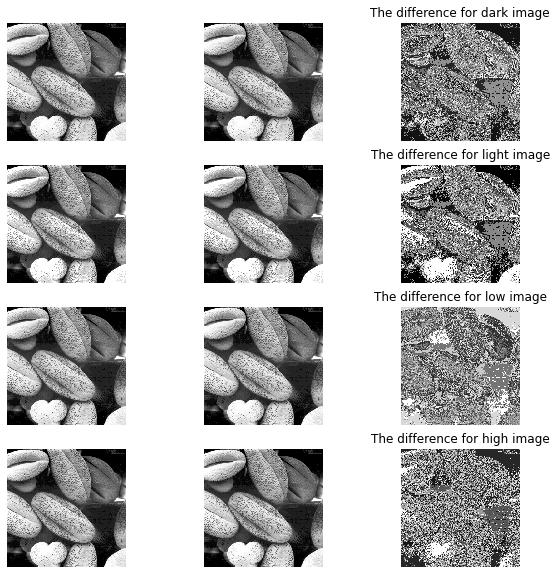

In [409]:
fig=plt.figure(figsize=(10,10))

plt.subplot(431)
plt.imshow(J_dark1,cmap='gray')

plt.axis('off')

plt.subplot(432)
plt.imshow(J_dark2,cmap='gray')
plt.axis('off')

plt.subplot(433)
plt.imshow(d_dark,cmap='gray')
plt.title("The difference for dark image")
plt.axis('off')


plt.subplot(434)
plt.imshow(J_light1,cmap='gray')
plt.axis('off')

plt.subplot(435)
plt.imshow(J_light2,cmap='gray')
plt.axis('off')

plt.subplot(436)
plt.imshow(d_light,cmap='gray')
plt.title("The difference for light image")
plt.axis('off')


plt.subplot(437)
plt.imshow(J_low1,cmap='gray')
plt.axis('off')

plt.subplot(438)
plt.imshow(J_low2,cmap='gray')
plt.axis('off')

plt.subplot(439)
plt.imshow(d_low,cmap='gray')
plt.title("The difference for low image")
plt.axis('off')

fig.add_subplot(4, 3, 10)

plt.imshow(J_high1,cmap='gray')
plt.axis('off')

fig.add_subplot(4, 3, 11)
plt.imshow(J_high2,cmap='gray')
plt.axis('off')

fig.add_subplot(4, 3, 12)
plt.imshow(d_high,cmap='gray')
plt.title("The difference for high image")
plt.axis('off')